In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[autoreload of display failed: Traceback (most recent call last):
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/aprilsin/opt/anaconda3/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/aprilsin/Documents/GitHub/cs194-proj4/display.py", l

In [40]:
from pathlib import Path


DATA_DIR = Path("data")
assert DATA_DIR.exists()

DANES_ROOT = DATA_DIR / Path("imm_face_db")
IBUG_ROOT = DATA_DIR / Path("ibug_300W_large_face_landmark_dataset")
train_xml = IBUG_ROOT/Path("labels_ibug_300W_train.xml")
test_xml = IBUG_ROOT/Path("labels_ibug_300W_test_parsed.xml")

In [41]:
%%capture
if not IBUG_ROOT.exists():
    !wget https://people.eecs.berkeley.edu/~zhecao/ibug_300W_large_face_landmark_dataset.zip
    !unzip 'data ibug_300W_large_face_landmark_dataset.zip'    
    !rm -r 'ibug_300W_large_face_landmark_dataset.zip'
    !mv ibug_300W_large_face_landmark_dataset data

In [42]:
assert DANES_ROOT.exists()
assert IBUG_ROOT.exists()

# Part 1

In [43]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader

import cnn
from constants import DEVICE
from dataloader import NoseKeypointDataset
from data_augment import part1_augment
from display import *
from learn import test, train, train_and_test

In [44]:
# Initialize Datasets

# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = NoseKeypointDataset(
    idxs=torch.arange(33), root_dir=DANES_ROOT, transform=part1_augment
)
assert len(training_set) == 192, len(training_set)

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = NoseKeypointDataset(
    idxs=torch.arange(32, 40), root_dir=DANES_ROOT, transform=part1_augment
)
assert len(validation_set) == 48

# Initialize Dataloaders
batch_size = 64
train_loader = DataLoader(training_set, batch_size, shuffle=True)
test_loader = DataLoader(validation_set, batch_size, shuffle=False)

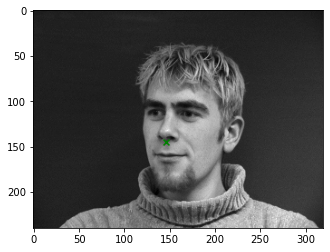

In [45]:
show_keypoints(training_set[2][0], training_set[2][1])

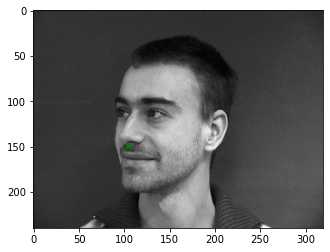

In [46]:
show_keypoints(training_set[134][0], training_set[134][1])

In [47]:
# Training and Testing

model = cnn.NoseFinder()
epochs = 1
learn_rate = 3e-4
show_every = 1

all_train_loss = train_and_test(train_loader, test_loader, model, epochs, learn_rate, show_every)


 33%|███▎      | 1/3 [00:07<00:14,  7.24s/it]


KeyboardInterrupt: 

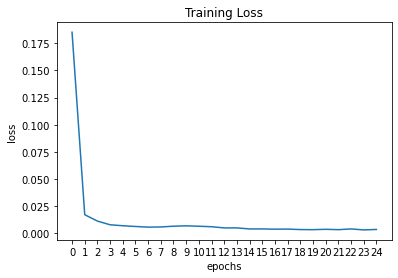

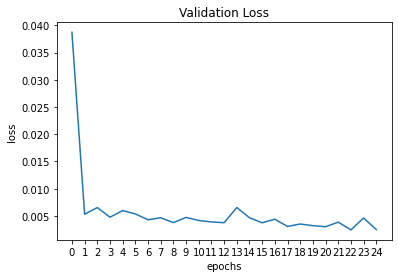

In [21]:
# Plot training and validation loss progress

show_progress(all_train_loss)

# Part 2

In [7]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader

import cnn
from dataloader import FaceKeypointsDataset
from data_augment import part2_augment
from display import *
from learn import test, train, train_and_test

In [8]:
# Initialize Datasets

# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = FaceKeypointsDataset(
    idxs=torch.arange(33), root_dir=DANES_ROOT, transform=part2_augment
)
assert len(training_set) == 192

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = FaceKeypointsDataset(
    idxs=torch.arange(32, 40), root_dir=DANES_ROOT, transform=part2_augment
)
assert len(validation_set) == 48

# Initialize Dataloaders
batch_size = 64
train_loader = DataLoader(training_set, batch_size, shuffle=True)
test_loader = DataLoader(validation_set, batch_size, shuffle=False)

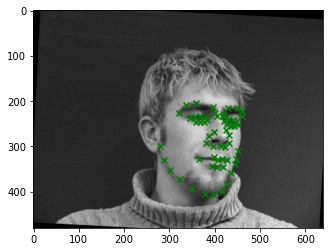

In [9]:
# Plotting a few input images and their face keypoints.

sample = training_set[3]
image, points = sample
show_keypoints(image, points)

In [10]:
# Training and Testing

model = cnn.FaceFinder()
epochs = 100
learn_rate = 3e-4
show_every = 3

loss_per_epoch = train_and_test(train_loader, test_loader, model, epochs, learn_rate, show_every)

  0%|          | 0/3 [00:17<?, ?it/s]


KeyboardInterrupt: 

IndexError: too many indices for array

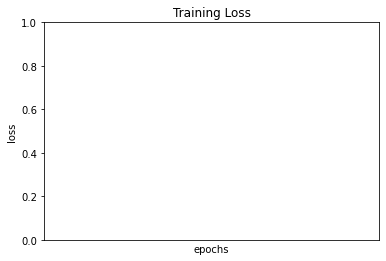

In [3]:
# Plot training and validation loss progress

loss_per_epoch = np.array(loss_per_epoch)
show_progress(loss_per_epoch)

# Part 3

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import torch
import torchvision.transforms as TT
from torch.utils.data import DataLoader

import cnn
from dataloader import LargeTrainDataset, LargeTestDataset
from data_augment import part3_augment
from display import *
from learn import test, train, train_and_test

In [2]:
# Initialite Datasets

training_set = LargeTrainDataset(IBUG_ROOT,train_xml)
assert len(training_set) == 6666
validation_set = LargeTestDataset(IBUG_ROOT,test_xml)
assert len(validation_set) == 1008

# Initialize Dataloaders
batch_size = 250
train_loader = DataLoader(training_set, batch_size, shuffle=True)
test_loader = DataLoader(validation_set, batch_size, shuffle=False)

NameError: name 'IBUG_ROOT' is not defined

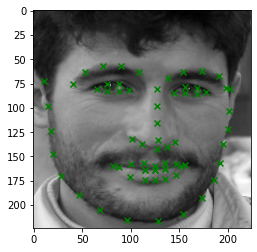

In [19]:
show_keypoints(training_set[2][0], training_set[2][1])

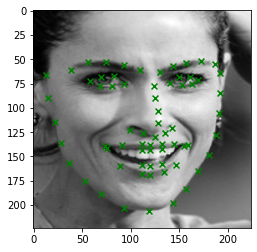

In [20]:
show_keypoints(training_set[134][0], training_set[134][1])

In [41]:
# Training and Testing
import cnn
model=cnn.ResNet()
model.model.fc
epochs = 1
learn_rate = 3e-4
show_every = 1

loss_per_epoch = train_and_test(train_loader, test_loader, model, epochs, learn_rate, show_every)

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


AttributeError: 'NoneType' object has no attribute 'model'

In [ ]:
# Plot training and validation loss progress

loss_per_epoch = np.array(loss_per_epoch)
show_progress(loss_per_epoch)